**Importing the libraries**

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

**Target shows the polarity of the text: 1 for positive opinion of people about election and 0 for negative opinion.**

In [ ]:
# Importing the dataset
DATASET_COLUMNS=['link','text','date','no. likes','no. comments', 'target']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('+polarity.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)
df.head()

,link,text,date,no. likes,no. comments,target
0,https://twitter.com/Politics_2022_/status/1739...,South India 2024 Loksabha Opinion Poll 132 sea...,"Dec 25, 2023 Â· 12:05 PM UTC",324,27,1
1,https://twitter.com/LokmatTimes_ngp/status/173...,"Veteran actor Nana Patekar says, ""There is no ...","Dec 25, 2023 Â· 1:00 PM UTC",0,0,1
2,https://twitter.com/Politics_2022_/status/1739...,South India BJP 2019 Loksabha Karnataka 25 Tel...,"Dec 25, 2023 Â· 12:21 PM UTC",142,18,0
3,https://twitter.com/rohanayak/status/173926994...,Issh baar 357 seats in Loksabha election.,"Dec 25, 2023 Â· 1:00 PM UTC",0,0,0
4,https://twitter.com/BellamSwathi/status/173919...,Total number of times MMS won his own lok sabh...,"Dec 25, 2023 Â· 8:19 AM UTC",589,80,1


In [ ]:
df.columns

Index(['link', 'text', 'date', 'no. likes', 'no. comments', 'target'], dtype='object')

**Data shape**

In [ ]:
print('length of data is', len(df))

length of data is 1000


In [ ]:
df. shape

(1000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          1000 non-null   object
 1   text          1000 non-null   object
 2   date          1000 non-null   object
 3   no. likes     1000 non-null   int64 
 4   no. comments  1000 non-null   int64 
 5   target        1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


In [ ]:
df.dtypes

link            object
text            object
date            object
no. likes        int64
no. comments     int64
target           int64
dtype: object

In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))


Count of columns in the data is:   6
Count of rows in the data is:   1000


**Polarity: either +1 or 0**

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df['target'].nunique()

2

In [ ]:

df.head()

,link,text,date,no. likes,no. comments,target
0,https://twitter.com/Politics_2022_/status/1739...,South India 2024 Loksabha Opinion Poll 132 sea...,"Dec 25, 2023 Â· 12:05 PM UTC",324,27,1
1,https://twitter.com/LokmatTimes_ngp/status/173...,"Veteran actor Nana Patekar says, ""There is no ...","Dec 25, 2023 Â· 1:00 PM UTC",0,0,1
2,https://twitter.com/Politics_2022_/status/1739...,South India BJP 2019 Loksabha Karnataka 25 Tel...,"Dec 25, 2023 Â· 12:21 PM UTC",142,18,0
3,https://twitter.com/rohanayak/status/173926994...,Issh baar 357 seats in Loksabha election.,"Dec 25, 2023 Â· 1:00 PM UTC",0,0,0
4,https://twitter.com/BellamSwathi/status/173919...,Total number of times MMS won his own lok sabh...,"Dec 25, 2023 Â· 8:19 AM UTC",589,80,1


**Data visualisation**

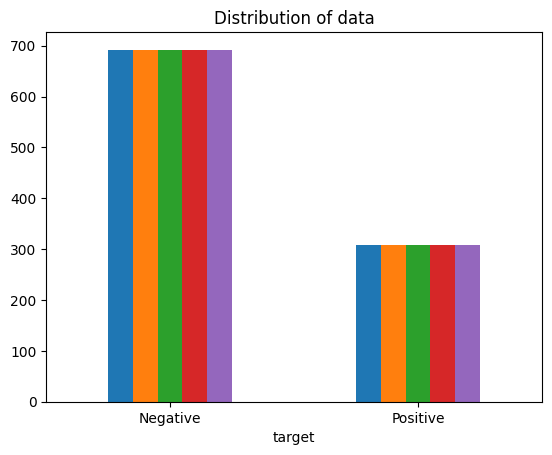

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

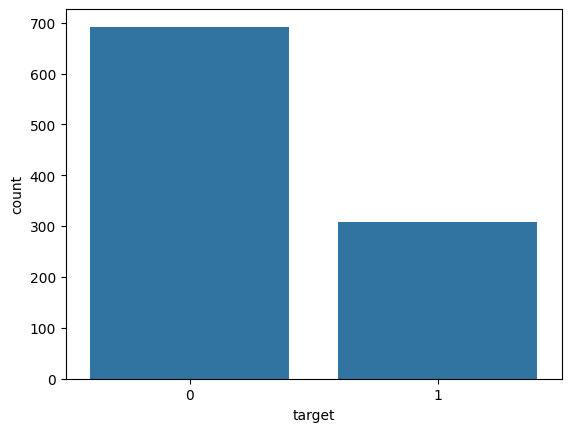

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
data=df[['text','target']]

In [ ]:
data['target'] = data['target'].replace(4,1)

<ipython-input-17-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
data['target'].unique()

array([1, 0])

In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(500)]
data_neg = data_neg.iloc[:int(500)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])

**Converting into lower case.**

In [ ]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

699    in loksabha election the karnataka seats will ...
700    u.p. mein jeetna @incuttarpradesh ke bas ki ba...
702    #delhi | prime minister narendra modi, lok sab...
704    haryana lok sabha mein sonipat or rohtak chor ...
706    prime minister shri @narendramodi and @loksabh...
Name: text, dtype: object

**Removing all the unnecessary(stop words) words from the text**

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    south india 2024 loksabha opinion poll 132 sea...
1    veteran actor nana patekar says, "there no alt...
4    total number times mms lok sabha seat - zero h...
7    not unhappy upset anyone, party stands india a...
8    no alternative bjp. easily get 350-375+ seats ...
Name: text, dtype: object

**Removing the punctuation marks from the text**

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

699    loksabha election karnataka seats bjp plus jds...
700    up mein jeetna incuttarpradesh ke bas ki baat ...
702    delhi  prime minister narendra modi lok sabha ...
704    haryana lok sabha mein sonipat rohtak chor ke ...
706    prime minister shri narendramodi loksabhaspeak...
Name: text, dtype: object

**Removing repeating characters, URLs and Numbers from the text.**



In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

699    loksabha election karnataka seats bjp plus jds...
700    up mein jeetna incuttarpradesh ke bas ki baat ...
702    delhi  prime minister narendra modi lok sabha ...
704    haryana lok sabha mein sonipat rohtak chor ke ...
706    prime minister shri narendramodi loksabhaspeak...
Name: text, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

699    loksabha election karnataka seats bjp plus jds...
700    up mein jeetna incuttarpradesh ke bas ki baat ...
702    delhi  prime minister narendra modi lok sabha ...
704    haryana lok sabha mein sonipat rohtak chor ke ...
706    prime minister shri narendramodi loksabhaspeak...
Name: text, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

699    loksabha election karnataka seats bjp plus jds...
700    up mein jeetna incuttarpradesh ke bas ki baat ...
702    delhi  prime minister narendra modi lok sabha ...
704    haryana lok sabha mein sonipat rohtak chor ke ...
706    prime minister shri narendramodi loksabhaspeak...
Name: text, dtype: object

**Converting text into tokens of word**

In [ ]:
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import numpy as np

# Load the dataset
# dataset = pd.read_csv('your_dataset.csv')

# Correct tokenizer pattern
tokenizer = RegexpTokenizer(r'\w+')

# Function to handle text tokenization
def tokenize_text(text):
    if isinstance(text, (list, np.ndarray)):
        text = ' '.join(map(str, text))  # Join list or array elements into a single string
    elif pd.isna(text):  # Check for NaN values
        return []
    return tokenizer.tokenize(str(text))

# Apply the tokenizer to the text column
dataset['text'] = dataset['text'].apply(tokenize_text)

# Display the first few rows to check the output
print(dataset['text'].head())

0    [south, india, loksabha, opinion, poll, seats,...
1    [veteran, actor, nana, patekar, says, there, n...
4    [total, number, times, mms, lok, sabha, seat, ...
7    [not, unhappy, upset, anyone, party, stands, i...
8    [no, alternative, bjp, easily, get, seats, lok...
Name: text, dtype: object


**Stemming:converts words into their root meaning.**

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()


0    [south, india, loksabha, opinion, poll, seats,...
1    [veteran, actor, nana, patekar, says, there, n...
4    [total, number, times, mms, lok, sabha, seat, ...
7    [not, unhappy, upset, anyone, party, stands, i...
8    [no, alternative, bjp, easily, get, seats, lok...
Name: text, dtype: object

In [ ]:

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: Download additional language data for better lemmatization

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

0    [south, india, loksabha, opinion, poll, seats,...
1    [veteran, actor, nana, patekar, says, there, n...
4    [total, number, times, mms, lok, sabha, seat, ...
7    [not, unhappy, upset, anyone, party, stands, i...
8    [no, alternative, bjp, easily, get, seats, lok...
Name: text, dtype: object

In [ ]:
X=data.text
y=data.target

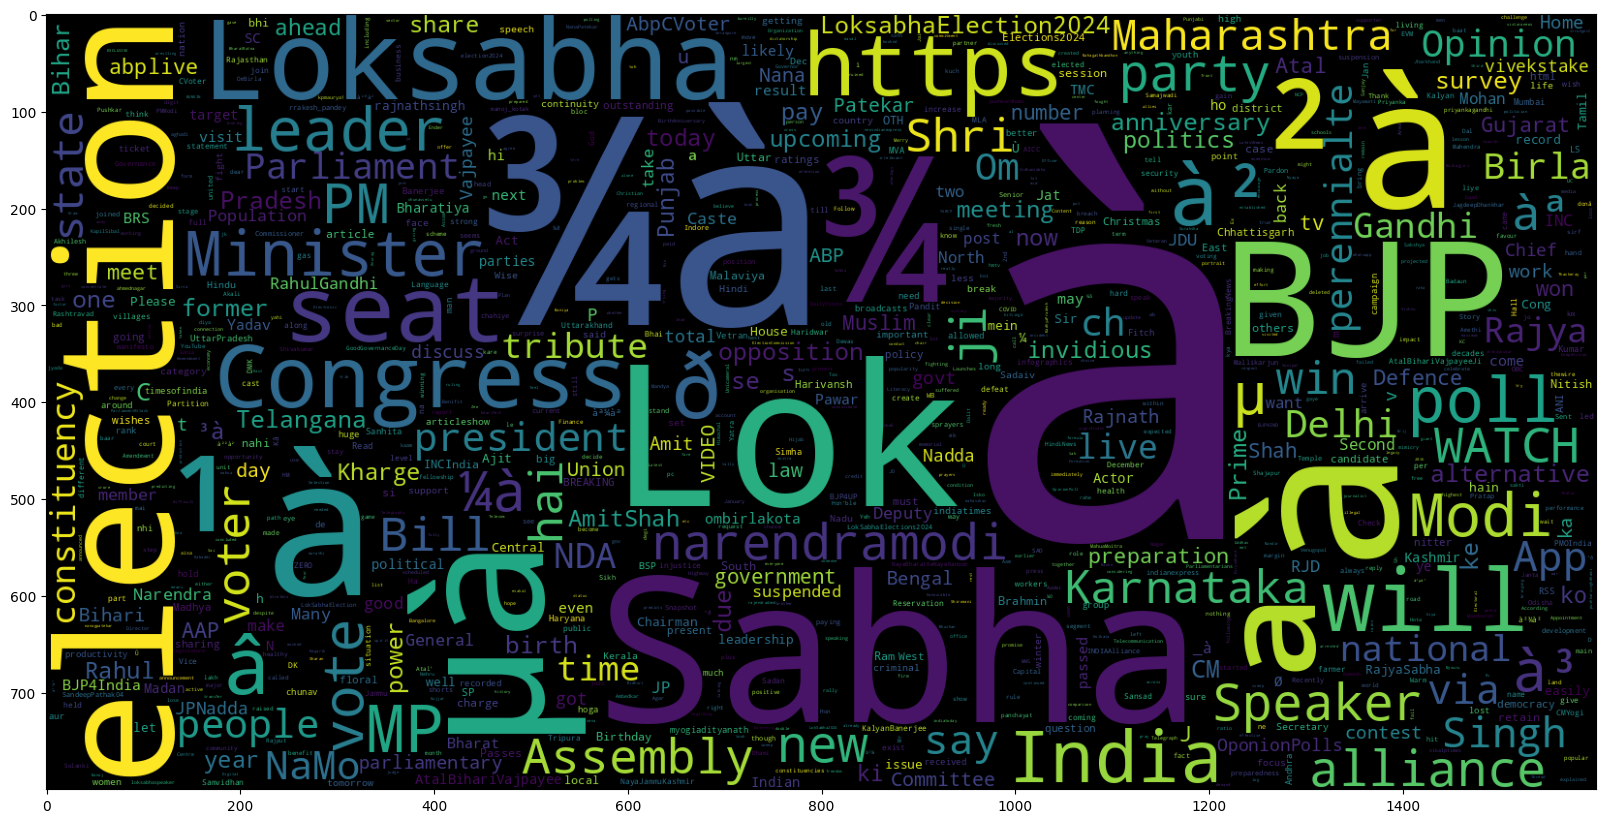

In [ ]:
data_neg = data['text'][:800]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:
print(X_train.isnull().sum())


0


In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))


No. of feature_words:  22236


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)


**Models and their evaluation shown by roc curve and area under them**

In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Model-1: Bernoulli Naive Bayes**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      1.00      0.78        32
           1       0.00      0.00      0.00        18

    accuracy                           0.64        50
   macro avg       0.32      0.50      0.39        50
weighted avg       0.41      0.64      0.50        50



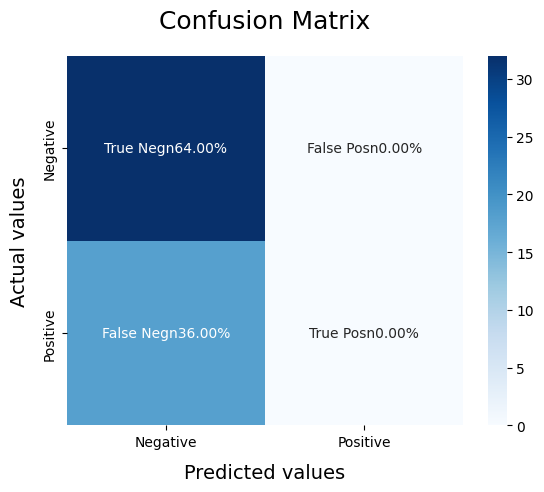

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

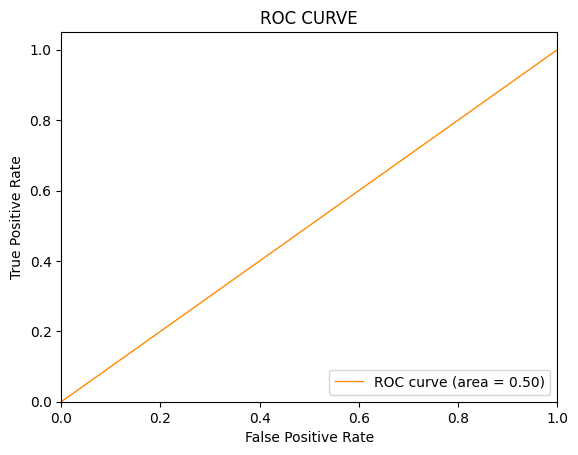

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Model-2: SVM (support vector machine)**

              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.67      0.56      0.61        18

    accuracy                           0.74        50
   macro avg       0.72      0.70      0.71        50
weighted avg       0.73      0.74      0.73        50



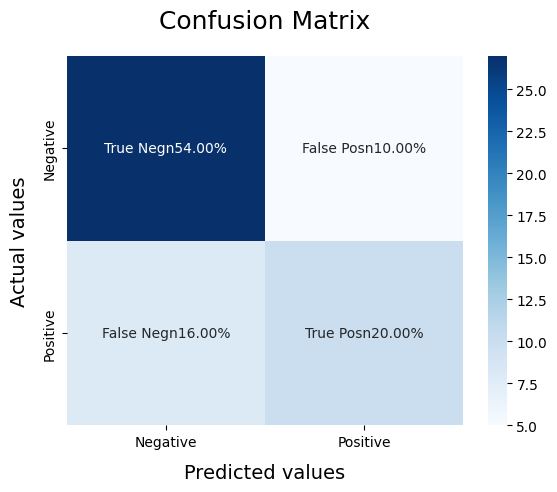

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

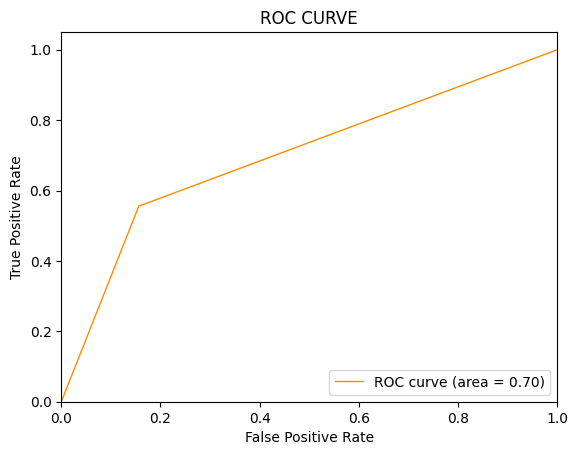

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Model-3: Logistic Regression**

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.62      0.44      0.52        18

    accuracy                           0.70        50
   macro avg       0.67      0.64      0.65        50
weighted avg       0.69      0.70      0.69        50



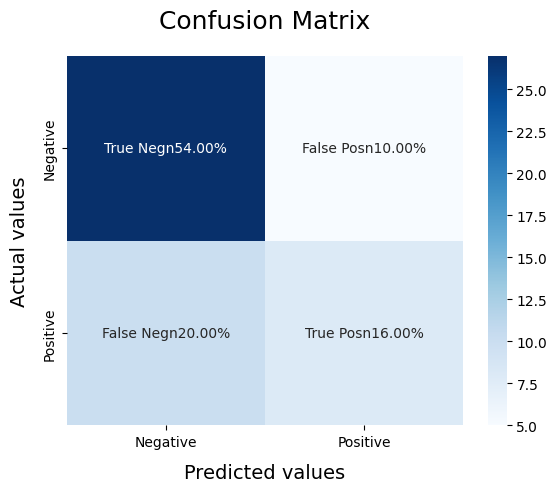

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

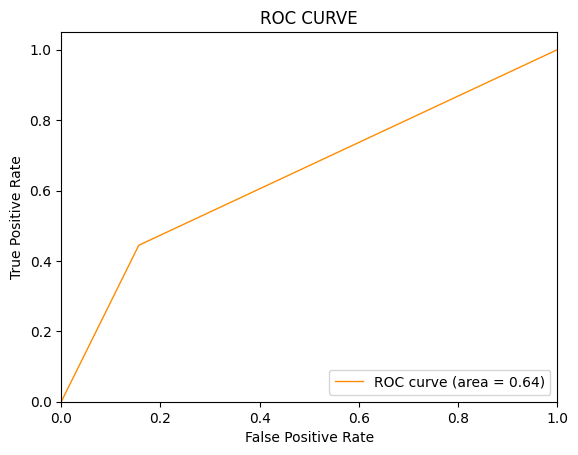

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()